In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [86]:

data = pd.read_csv('/content/HousePricePrediction.csv')

print(data.head())
print(data.describe())


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
                Id   MSSubClass        LotArea  OverallCond    YearBuilt  \
count  2919.000000  2919.000000    

In [87]:

print(data.isnull().sum())



Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [88]:
data = data.dropna()

In [89]:
print(data.isnull().sum())

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64


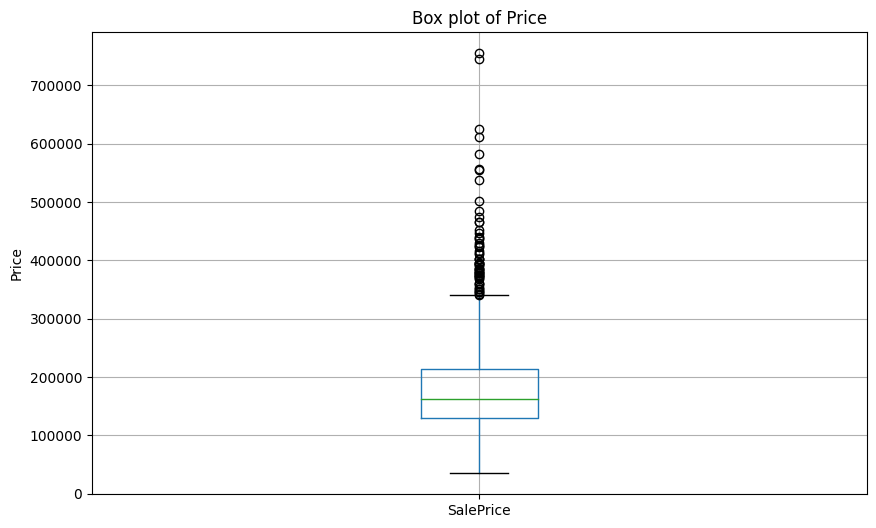

In [90]:

plt.figure(figsize=(10, 6))
data.boxplot(column='SalePrice')
plt.ylabel('Price')
plt.title('Box plot of Price')
plt.show()



In [91]:
 Q1 = data['SalePrice'].quantile(0.25)
 Q3 = data['SalePrice'].quantile(0.75)
 IQR = Q3 - Q1
 data = data[(data['SalePrice'] >= Q1 - 1.5 * IQR) & (data['SalePrice'] <= Q3 + 1.5 * IQR)]

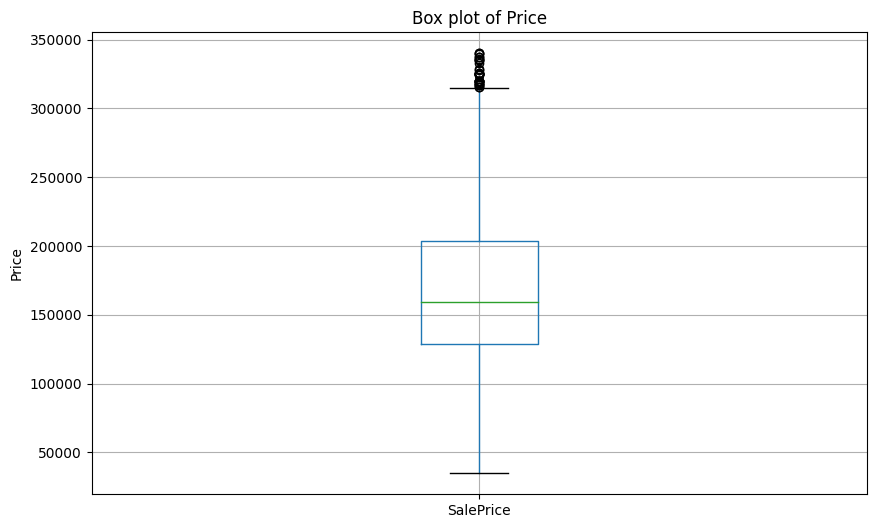

In [92]:
plt.figure(figsize=(10, 6))
data.boxplot(column='SalePrice')
plt.ylabel('Price')
plt.title('Box plot of Price')
plt.show()

In [78]:

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)


In [79]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [80]:
y_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [82]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [84]:
mbs = mean_absolute_percentage_error(y_test, y_pred)
print("mean_absolute_percentage_error: ", mbs)
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared Score: {r2}")

mean_absolute_percentage_error:  0.1402054386859679
Root Mean Squared Error: 30935.22685989992
R-squared Score: 0.7065011890598908
